## 1. Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import nltk
import gensim 


C:\Users\Dell\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


## 2. Loading the Dataset

In [4]:
df = pd.read_csv("../data/postings.csv") 

# 3. Data Analysis

### 3.1 Displaying top 5 rows

In [7]:
df.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


### 3.2 Displaying botton 5 rows

In [9]:
df.tail()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,NaN,NaN,United States,1124131.0,3.0,NaN,...,NaN,1.713572e+12,www.pinterestcareers.com,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,NaN,"Spokane, WA",90552133.0,3.0,NaN,...,NaN,1.713572e+12,epsoperations.bamboohr.com,0,FULL_TIME,NaN,NaN,NaN,99201.0,53063.0
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,4.0,NaN,...,NaN,1.713573e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
123848,3906267224,Solugenix,Marketing Social Media Specialist,Marketing Social Media Specialist - $70k – $75...,75000.0,YEARLY,"San Juan Capistrano, CA",43325.0,2.0,NaN,...,NaN,1.713573e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,72500.0,92675.0,6059.0


### 3.3 Displaying shape of the Dataset

In [11]:
s=df.shape
print('total number of rows:', s[0])
print('total number of columns:',s[1])

total number of rows: 123849
total number of columns: 31


### 3.4 information of dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

### 3.5 display column name

In [15]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips'],
      dtype='object')

### 3.6 Finding duplicates

In [17]:
print('any duplicates in dataset:', df.duplicated().sum().any())

any duplicates in dataset: False


In [18]:
print('total no of duplicates iin dataset:',df.duplicated().sum().sum())

total no of duplicates iin dataset: 0


### 3.7 Finding Null values

In [20]:
print('any null values in dataset:', df.isnull().sum().any())

any null values in dataset: True


In [21]:
print('Total no of null values in dataset:', df.isnull().sum().sum())

Total no of null values in dataset: 1269564


In [22]:
df.isnull().sum()

job_id                             0
company_name                    1719
title                              0
description                        7
max_salary                     94056
pay_period                     87776
location                           0
company_id                      1717
views                           1689
med_salary                    117569
min_salary                     94056
formatted_work_type                0
applies                       100529
original_listed_time               0
remote_allowed                108603
job_posting_url                    0
application_url                36665
application_type                   0
expiry                             0
closed_time                   122776
formatted_experience_level     29409
skills_desc                   121410
listed_time                        0
posting_domain                 39968
sponsored                          0
work_type                          0
currency                       87776
c

In [23]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Segregate the columns into categories
text_columns = ['title', 'description', 'location', 'formatted_work_type', 
                'job_posting_url', 'application_url', 'application_type', 
                'formatted_experience_level', 'skills_desc', 'posting_domain', 
                'work_type', 'currency', 'compensation_type']

numeric_columns = ['job_id', 'max_salary', 'views', 'med_salary', 'min_salary', 
                   'applies', 'original_listed_time', 'expiry', 'closed_time', 
                   'listed_time', 'sponsored', 'normalized_salary', 'zip_code', 'fips']

categorical_columns = ['company_name', 'company_id', 'remote_allowed']

# *1. Drop Columns with Too Many Missing Values*
df.drop(columns=['remote_allowed', 'closed_time', 'applies'], inplace=True)

# *2. Fill Missing Categorical Values with Mode*
categorical_cols = ['company_name', 'pay_period', 'formatted_experience_level',
                    'posting_domain', 'work_type', 'application_url', 'compensation_type', 'currency']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # Avoid chained assignment

# *3. Fill Missing Numerical Values with Median (-1 as Placeholder Alternative)*
numerical_cols = ['company_id', 'views', 'max_salary', 'min_salary', 'med_salary', 'normalized_salary', 'zip_code', 'fips']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())  # Avoid chained assignment

# *4. Drop Rows Where 'description' or 'skills_desc' is Missing*
df.dropna(subset=['description'], inplace=True)
df.dropna(subset=['skills_desc'], inplace=True)

# *5. Convert Data Types (if needed)*
df['company_id'] = df['company_id'].astype(int, errors='ignore')
df['views'] = df['views'].astype(int, errors='ignore')
df['zip_code'] = df['zip_code'].astype(int, errors='ignore')
df['fips'] = df['fips'].astype(int, errors='ignore')

# *6. Text Preprocessing*

# Fill nulls in text columns with the most frequent value (mode)
for column in text_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

# Text preprocessing function
def preprocess_text(text):
    if pd.isna(text):  # Handle missing values (though we already filled nulls)
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Apply preprocessing to all text columns
for column in text_columns:
    df[f'cleaned_{column}'] = df[column].apply(preprocess_text)

# *7. Final Check*
print(df.isnull().sum())

# Check the cleaned data
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


job_id                                0
company_name                          0
title                                 0
description                           0
max_salary                            0
pay_period                            0
location                              0
company_id                            0
views                                 0
med_salary                            0
min_salary                            0
formatted_work_type                   0
original_listed_time                  0
job_posting_url                       0
application_url                       0
application_type                      0
expiry                                0
formatted_experience_level            0
skills_desc                           0
listed_time                           0
posting_domain                        0
sponsored                             0
work_type                             0
currency                              0
compensation_type                     0


,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,cleaned_formatted_work_type,cleaned_job_posting_url,cleaned_application_url,cleaned_application_type,cleaned_formatted_experience_level,cleaned_skills_desc,cleaned_posting_domain,cleaned_work_type,cleaned_currency,cleaned_compensation_type
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458,20,25.5,...,fulltime,httpswwwlinkedincomjobsviewtrkjobsbizpremsrch,httpsappdataannotationtechworkersignupprojects...,complexonsiteapply,midsenior level,requirement seeking college graduate student a...,wwwclickapplynet,fulltime,usd,basesalary
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719,8,25.5,...,fulltime,httpswwwlinkedincomjobsviewtrkjobsbizpremsrch,httpsappdataannotationtechworkersignupprojects...,complexonsiteapply,midsenior level,currently accepting resume foh asisstant resta...,wwwclickapplynet,fulltime,usd,basesalary
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262,16,25.5,...,fulltime,httpswwwlinkedincomjobsviewtrkjobsbizpremsrch,httpsappdataannotationtechworkersignupprojects...,complexonsiteapply,midsenior level,position requires baseline understanding onlin...,wwwclickapplynet,fulltime,usd,basesalary
8,1218575,Children's Nebraska,Respiratory Therapist,"At Children’s, the region’s only full-service ...",80000.0,YEARLY,"Omaha, NE",721189,3,25.5,...,fulltime,httpswwwlinkedincomjobsviewtrkjobsbizpremsrch,wwwchildrensnebraskaorg,offsiteapply,midsenior level,requires ability communicate effective verball...,wwwclickapplynet,fulltime,usd,basesalary
9,2264355,Bay West Church,Worship Leader,It is an exciting time to be a part of our chu...,80000.0,MONTHLY,"Palm Bay, FL",28631247,5,350.0,...,parttime,httpswwwlinkedincomjobsviewtrkjobsbizpremsrch,httpsappdataannotationtechworkersignupprojects...,complexonsiteapply,midsenior level,knowledge skill ability proficient computer te...,wwwclickapplynet,parttime,usd,basesalary


df.shape

### Training the model

In [26]:
# Combine relevant text columns into one column for topic modeling
df['combined_text'] = df['title'] + ' ' + df['description'] + ' ' + df['skills_desc']

# Check the first few rows to ensure the combined text looks correct
df[['title', 'description', 'skills_desc', 'combined_text']].head()

,title,description,skills_desc,combined_text
0,Marketing Coordinator,Job descriptionA leading real estate firm in N...,Requirements: \n\nWe are seeking a College or ...,Marketing Coordinator Job descriptionA leading...
2,Assitant Restaurant Manager,The National Exemplar is accepting application...,We are currently accepting resumes for FOH - A...,Assitant Restaurant Manager The National Exemp...
3,Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,This position requires a baseline understandin...,Senior Elder Law / Trusts and Estates Associat...
8,Respiratory Therapist,"At Children’s, the region’s only full-service ...",• Requires the ability to communicate effectiv...,"Respiratory Therapist At Children’s, the regio..."
9,Worship Leader,It is an exciting time to be a part of our chu...,"Knowledge, Skills and Abilities: 1. Proficient...",Worship Leader It is an exciting time to be a ...


In [28]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords and WordNet for lemmatization
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # For lemmatization

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean and preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation, numbers, and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization
    tokens = text.split()
    
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply the preprocessing function to the combined_text column
df['cleaned_text'] = df['combined_text'].apply(preprocess_text)

# Check the cleaned text
df[['combined_text', 'cleaned_text']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...


,combined_text,cleaned_text
0,Marketing Coordinator Job descriptionA leading...,marketing coordinator job descriptiona leading...
2,Assitant Restaurant Manager The National Exemp...,assitant restaurant manager national exemplar ...
3,Senior Elder Law / Trusts and Estates Associat...,senior elder law trust estate associate attorn...
8,"Respiratory Therapist At Children’s, the regio...",respiratory therapist childrens region fullser...
9,Worship Leader It is an exciting time to be a ...,worship leader exciting time part church looki...


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the 'combined_text' column
X = vectorizer.fit_transform(df['cleaned_text'])

# Check the shape of the resulting matrix (this will show how many documents and features we have)
print(X.shape)


(2439, 1000)


## Fitting the LDA model

In [35]:
from sklearn.decomposition import LatentDirichletAllocation

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # We are specifying 5 topics for now
lda.fit(X)

# Display the top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Get the top words for each topic (You can adjust n_top_words as needed)
n_top_words = 10
print_top_words(lda, vectorizer.get_feature_names_out(), n_top_words)


Topic #0:
careerstaff rn experience design registered nurse data developer healthcare unlimited
Topic #1:
nursing nurse surveillance liberty library patient care frasco investigation assistant
Topic #2:
volunteer patient care community family health hospice help provided need
Topic #3:
sale team customer business experience project work client manager management
Topic #4:
work equipment maintenance service technician company required employee job customer


In [37]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords and WordNet for lemmatization
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # For lemmatization

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean and preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation, numbers, and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization
    tokens = text.split()
    
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply the preprocessing function to the combined_text column
df['cleaned_text'] = df['combined_text'].apply(preprocess_text)

# Check the cleaned text
df[['combined_text', 'cleaned_text']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,combined_text,cleaned_text
0,Marketing Coordinator Job descriptionA leading...,marketing coordinator job descriptiona leading...
2,Assitant Restaurant Manager The National Exemp...,assitant restaurant manager national exemplar ...
3,Senior Elder Law / Trusts and Estates Associat...,senior elder law trust estate associate attorn...
8,"Respiratory Therapist At Children’s, the regio...",respiratory therapist childrens region fullser...
9,Worship Leader It is an exciting time to be a ...,worship leader exciting time part church looki...


In [39]:
from gensim import corpora
from gensim.models import LdaModel


# Create a dictionary and corpus from the cleaned text data
texts = df['cleaned_text'].apply(lambda x: x.split())
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train the LDA model (e.g., 5 topics)
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary)

Please enter your query:  analyst


C:\Users\Dell\AppData\Local\Temp\ipykernel_12224\1178034372.py:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ensure labels do not overlap


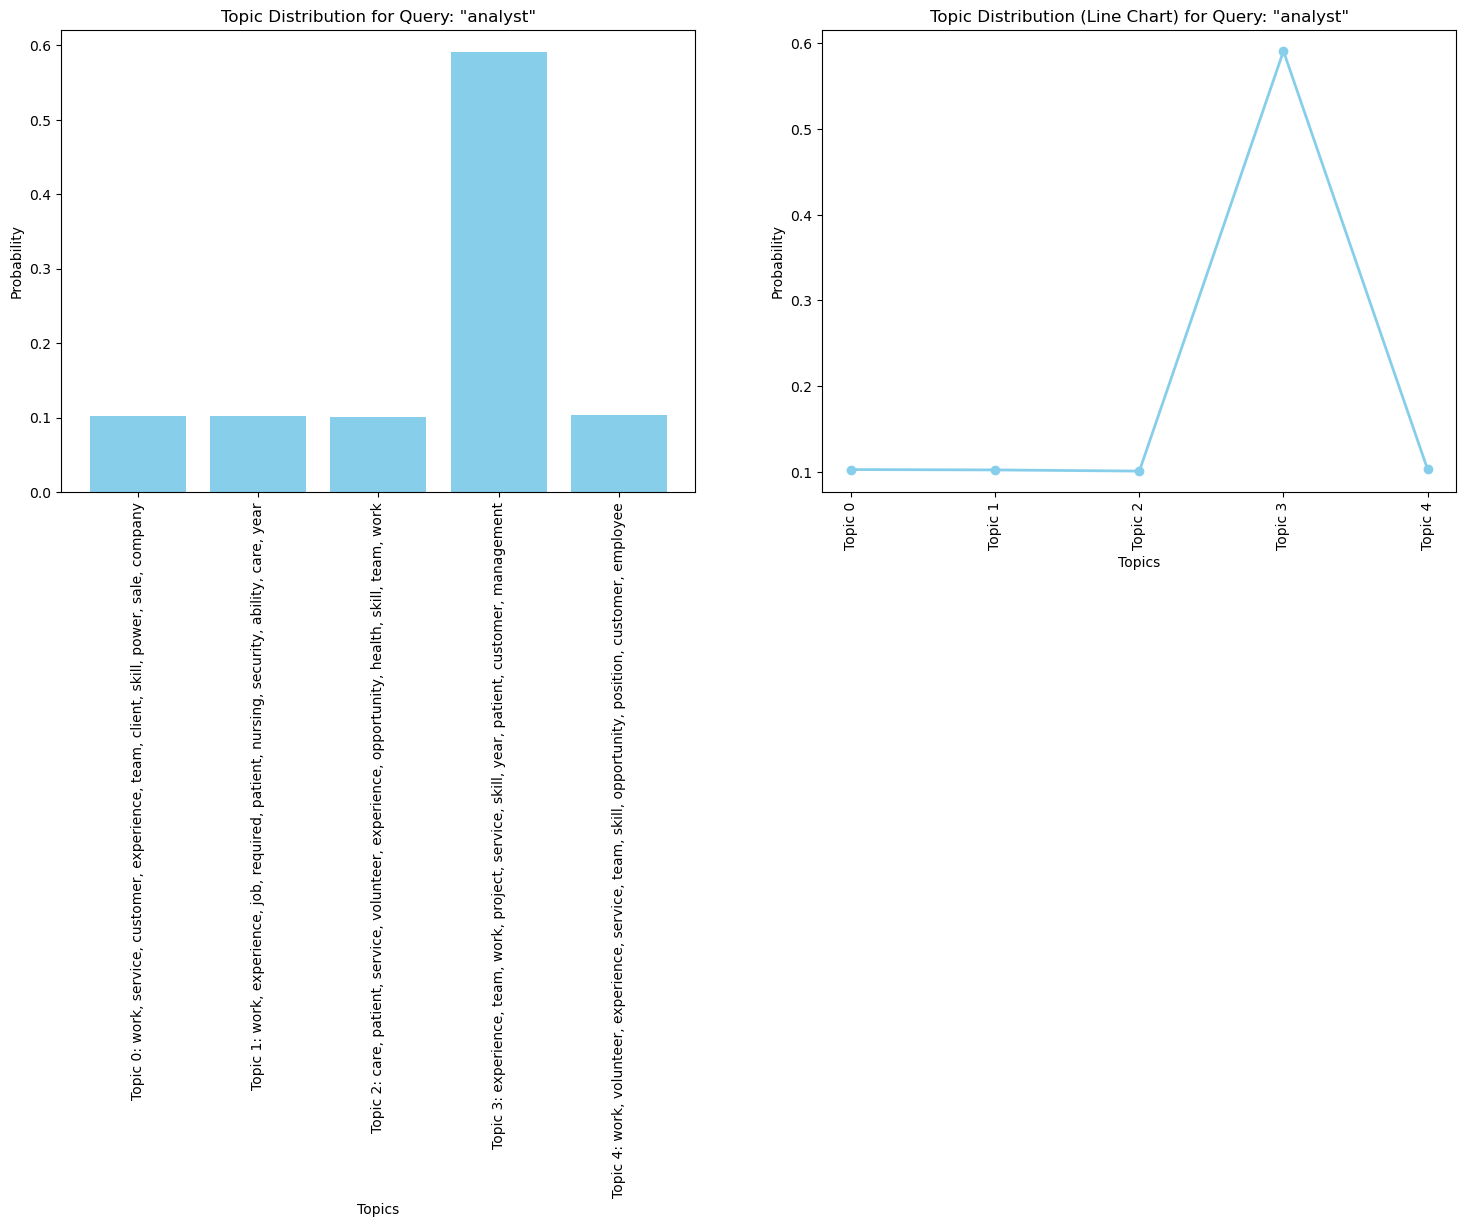

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming preprocess_text, lda_model, and dictionary are already defined
def query_to_lda(query, lda_model, dictionary):
    query_processed = preprocess_text(query)  # Preprocess the query
    query_bow = dictionary.doc2bow(query_processed.split())  # Convert to bag-of-words format
    query_lda = lda_model[query_bow]  # Get the topic distribution for the query
    return query_lda

# Function to get top keywords for each topic
def get_top_keywords_for_topic(lda_model, dictionary, num_words=10):
    keywords = {}
    for idx, topic in lda_model.show_topics(formatted=False, num_topics=lda_model.num_topics):
        top_keywords = [word for word, _ in topic[:num_words]]  # Get the top words for each topic
        keywords[f"Topic {idx}"] = top_keywords
    return keywords

# Function to plot both topic distribution (Bar and Line Chart)
def plot_topic_distribution(lda_model, query, dictionary, num_keywords=10):
    # Get the topic distribution for the query using the query_to_lda function
    topic_distribution = query_to_lda(query, lda_model, dictionary)
    
    # Get the top keywords for each topic
    topic_keywords = get_top_keywords_for_topic(lda_model, dictionary, num_keywords)
    
    # Plot topic distribution as a bar graph
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))
    
    # Bar chart for topic distribution
    topic_probs = [prob for _, prob in topic_distribution]
    ax[0].bar(np.arange(len(topic_probs)), topic_probs, color='skyblue')
    ax[0].set_xticks(np.arange(len(topic_probs)))
    ax[0].set_xticklabels([f"Topic {i}: {', '.join(topic_keywords[f'Topic {i}'])}" for i in range(len(topic_probs))], rotation=90)
    ax[0].set_xlabel('Topics')
    ax[0].set_ylabel('Probability')
    ax[0].set_title(f'Topic Distribution for Query: "{query}"')
    
    # Line chart for topic distribution
    ax[1].plot(np.arange(len(topic_probs)), topic_probs, marker='o', color='skyblue', linestyle='-', linewidth=2)
    ax[1].set_xticks(np.arange(len(topic_probs)))
    ax[1].set_xticklabels([f"Topic {i}" for i in range(len(topic_probs))], rotation=90)
    ax[1].set_xlabel('Topics')
    ax[1].set_ylabel('Probability')
    ax[1].set_title(f'Topic Distribution (Line Chart) for Query: "{query}"')
    
    plt.tight_layout()  # Ensure labels do not overlap
    plt.show()

# Get user input for the query
query = input("Please enter your query: ")

# Call the function to plot the topic distribution
plot_topic_distribution(lda_model, query, dictionary)

Enter the job role to analyze trends:  analyst


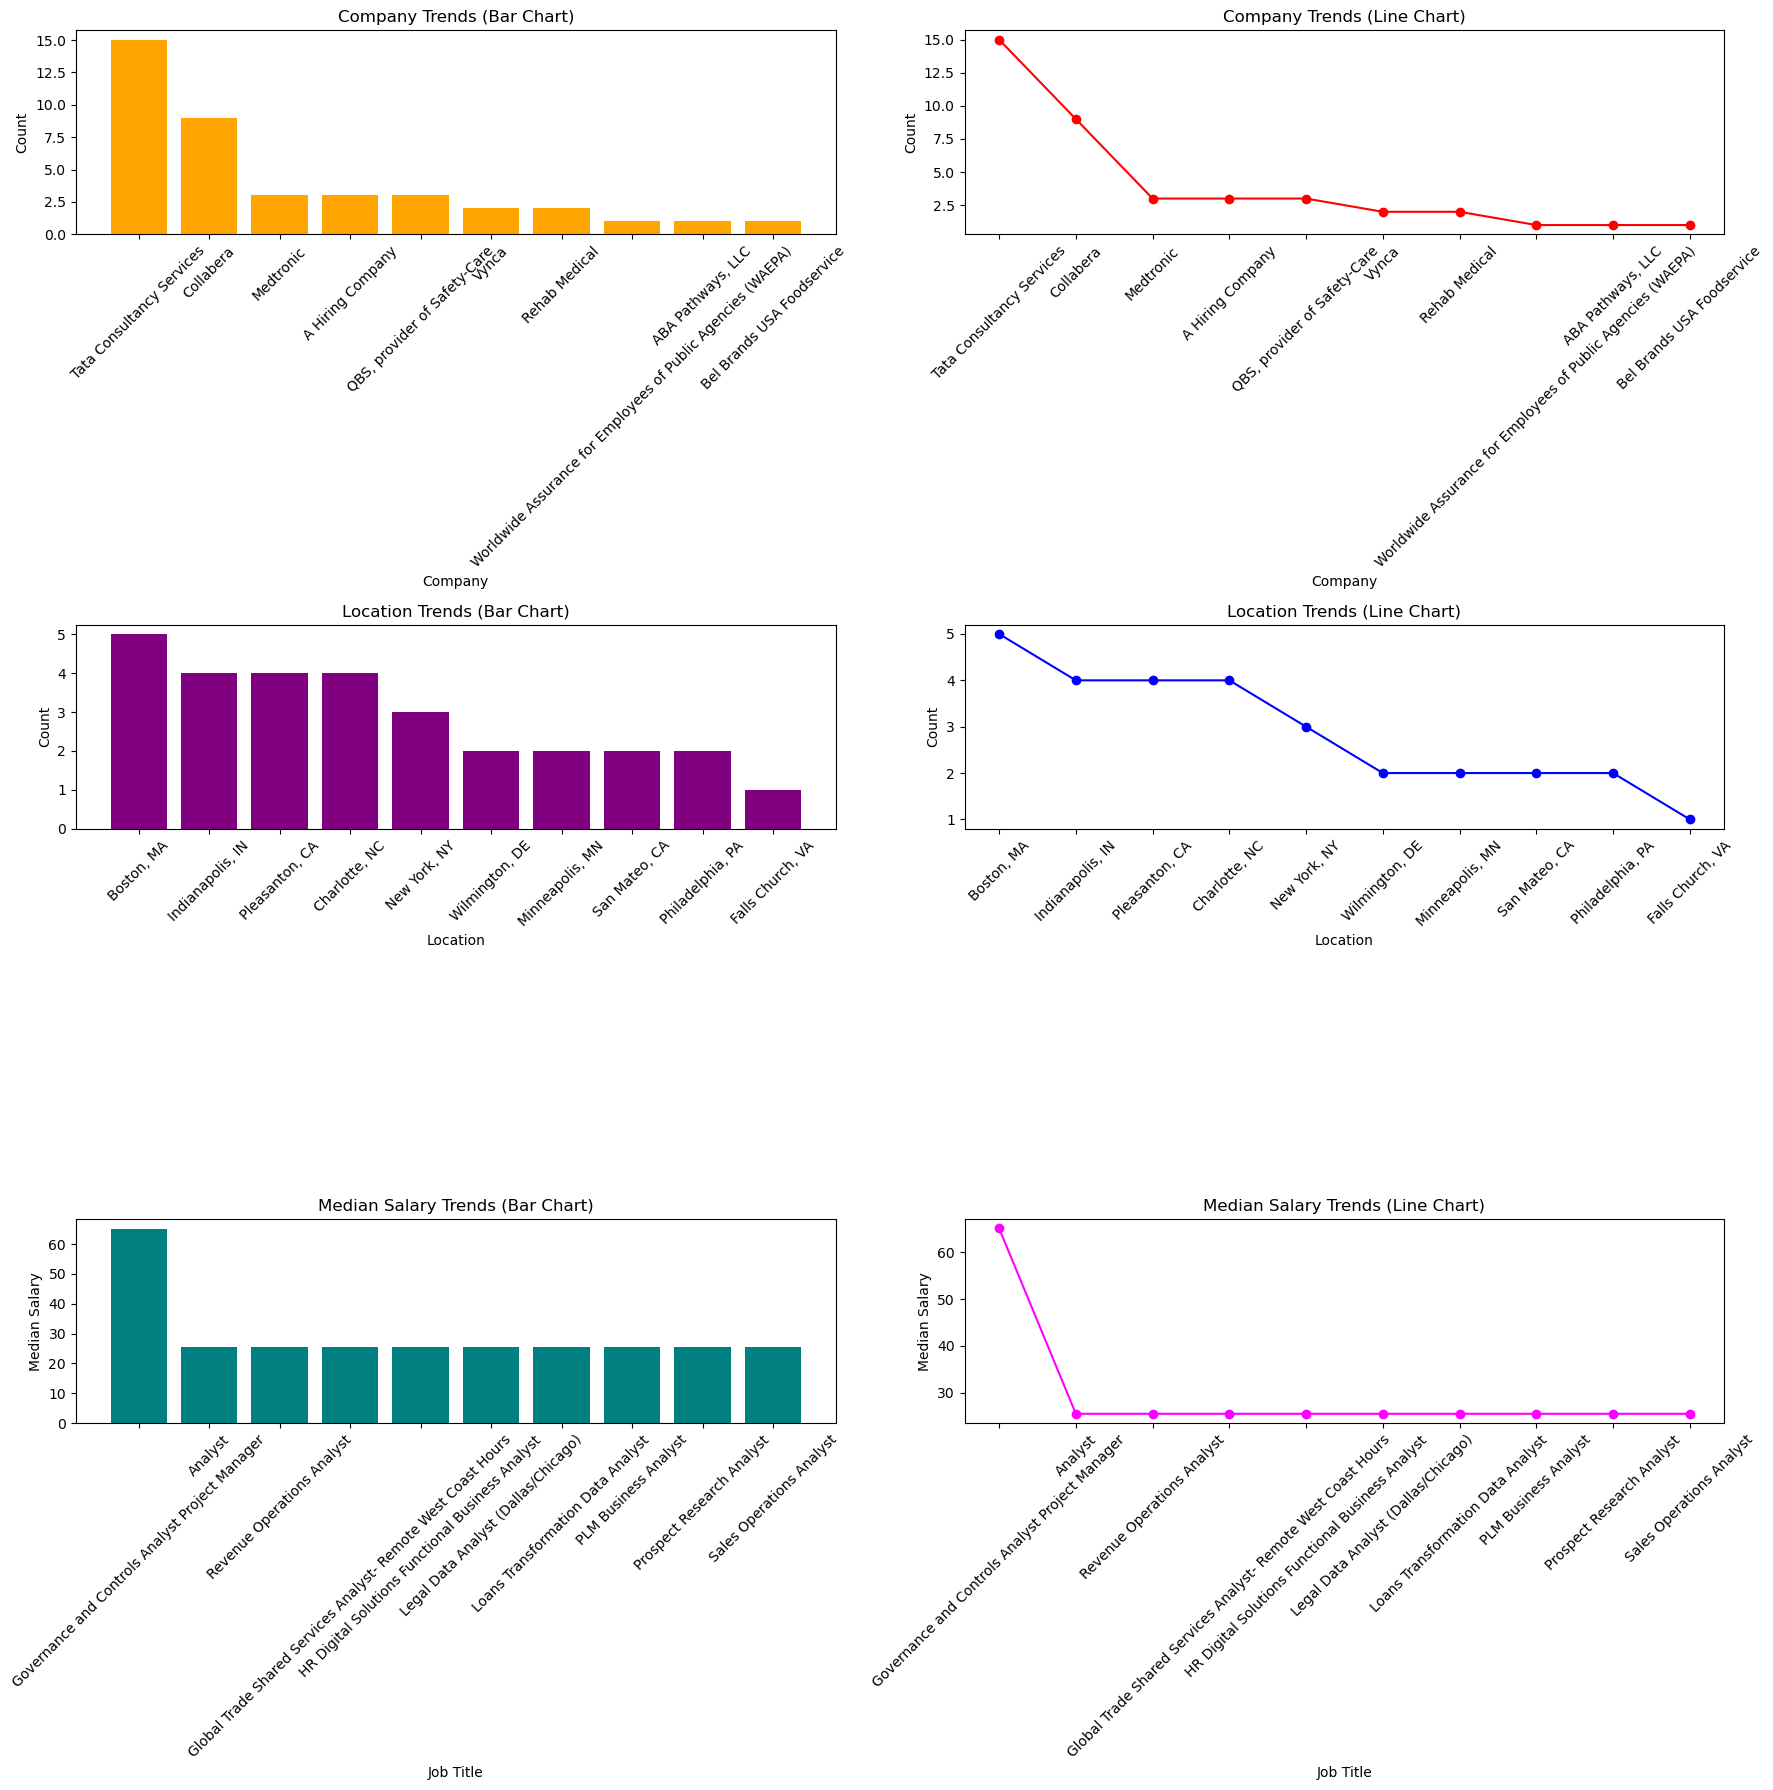

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your DataFrame with relevant columns
def plot_trends(df, job_role):
    # Filter data based on the selected job role
    filtered_df = df[df['title'].str.contains(job_role, case=False, na=False)]

    # Check if data exists for the job role
    if filtered_df.empty:
        print(f"No data found for job role: {job_role}")
        return

    # Grouping and counting for company and location trends
    company_counts = filtered_df['company_name'].value_counts()
    location_counts = filtered_df['location'].value_counts()

    # Handling salary trends (using max, median, and min salaries)
    salary_trends = filtered_df.groupby('title')[['max_salary', 'med_salary', 'min_salary']].mean().sort_values(by='med_salary', ascending=False)

    # Plotting
    fig, axs = plt.subplots(3, 2, figsize=(18, 18))  # 3 trends with bar and line charts side by side

    # Company Trends
    axs[0, 0].bar(company_counts.index[:10], company_counts.values[:10], color='orange')  # Top 10 companies
    axs[0, 0].set_title('Company Trends (Bar Chart)')
    axs[0, 0].set_xlabel('Company')
    axs[0, 0].set_ylabel('Count')
    axs[0, 0].tick_params(axis='x', rotation=45)

    axs[0, 1].plot(company_counts.index[:10], company_counts.values[:10], marker='o', linestyle='-', color='red')
    axs[0, 1].set_title('Company Trends (Line Chart)')
    axs[0, 1].set_xlabel('Company')
    axs[0, 1].set_ylabel('Count')
    axs[0, 1].tick_params(axis='x', rotation=45)

    # Location Trends
    axs[1, 0].bar(location_counts.index[:10], location_counts.values[:10], color='purple')  # Top 10 locations
    axs[1, 0].set_title('Location Trends (Bar Chart)')
    axs[1, 0].set_xlabel('Location')
    axs[1, 0].set_ylabel('Count')
    axs[1, 0].tick_params(axis='x', rotation=45)

    axs[1, 1].plot(location_counts.index[:10], location_counts.values[:10], marker='o', linestyle='-', color='blue')
    axs[1, 1].set_title('Location Trends (Line Chart)')
    axs[1, 1].set_xlabel('Location')
    axs[1, 1].set_ylabel('Count')
    axs[1, 1].tick_params(axis='x', rotation=45)

    # Salary Trends
    axs[2, 0].bar(salary_trends.index[:10], salary_trends['med_salary'].values[:10], color='teal')  # Top 10 job titles
    axs[2, 0].set_title('Median Salary Trends (Bar Chart)')
    axs[2, 0].set_xlabel('Job Title')
    axs[2, 0].set_ylabel('Median Salary')
    axs[2, 0].tick_params(axis='x', rotation=45)

    axs[2, 1].plot(salary_trends.index[:10], salary_trends['med_salary'].values[:10], marker='o', linestyle='-', color='magenta')
    axs[2, 1].set_title('Median Salary Trends (Line Chart)')
    axs[2, 1].set_xlabel('Job Title')
    axs[2, 1].set_ylabel('Median Salary')
    axs[2, 1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Get user input for the job role
job_role = input("Enter the job role to analyze trends: ")

# Call the function to plot trends
plot_trends(df, job_role)


Enter the job role to analyze trends:  clerk


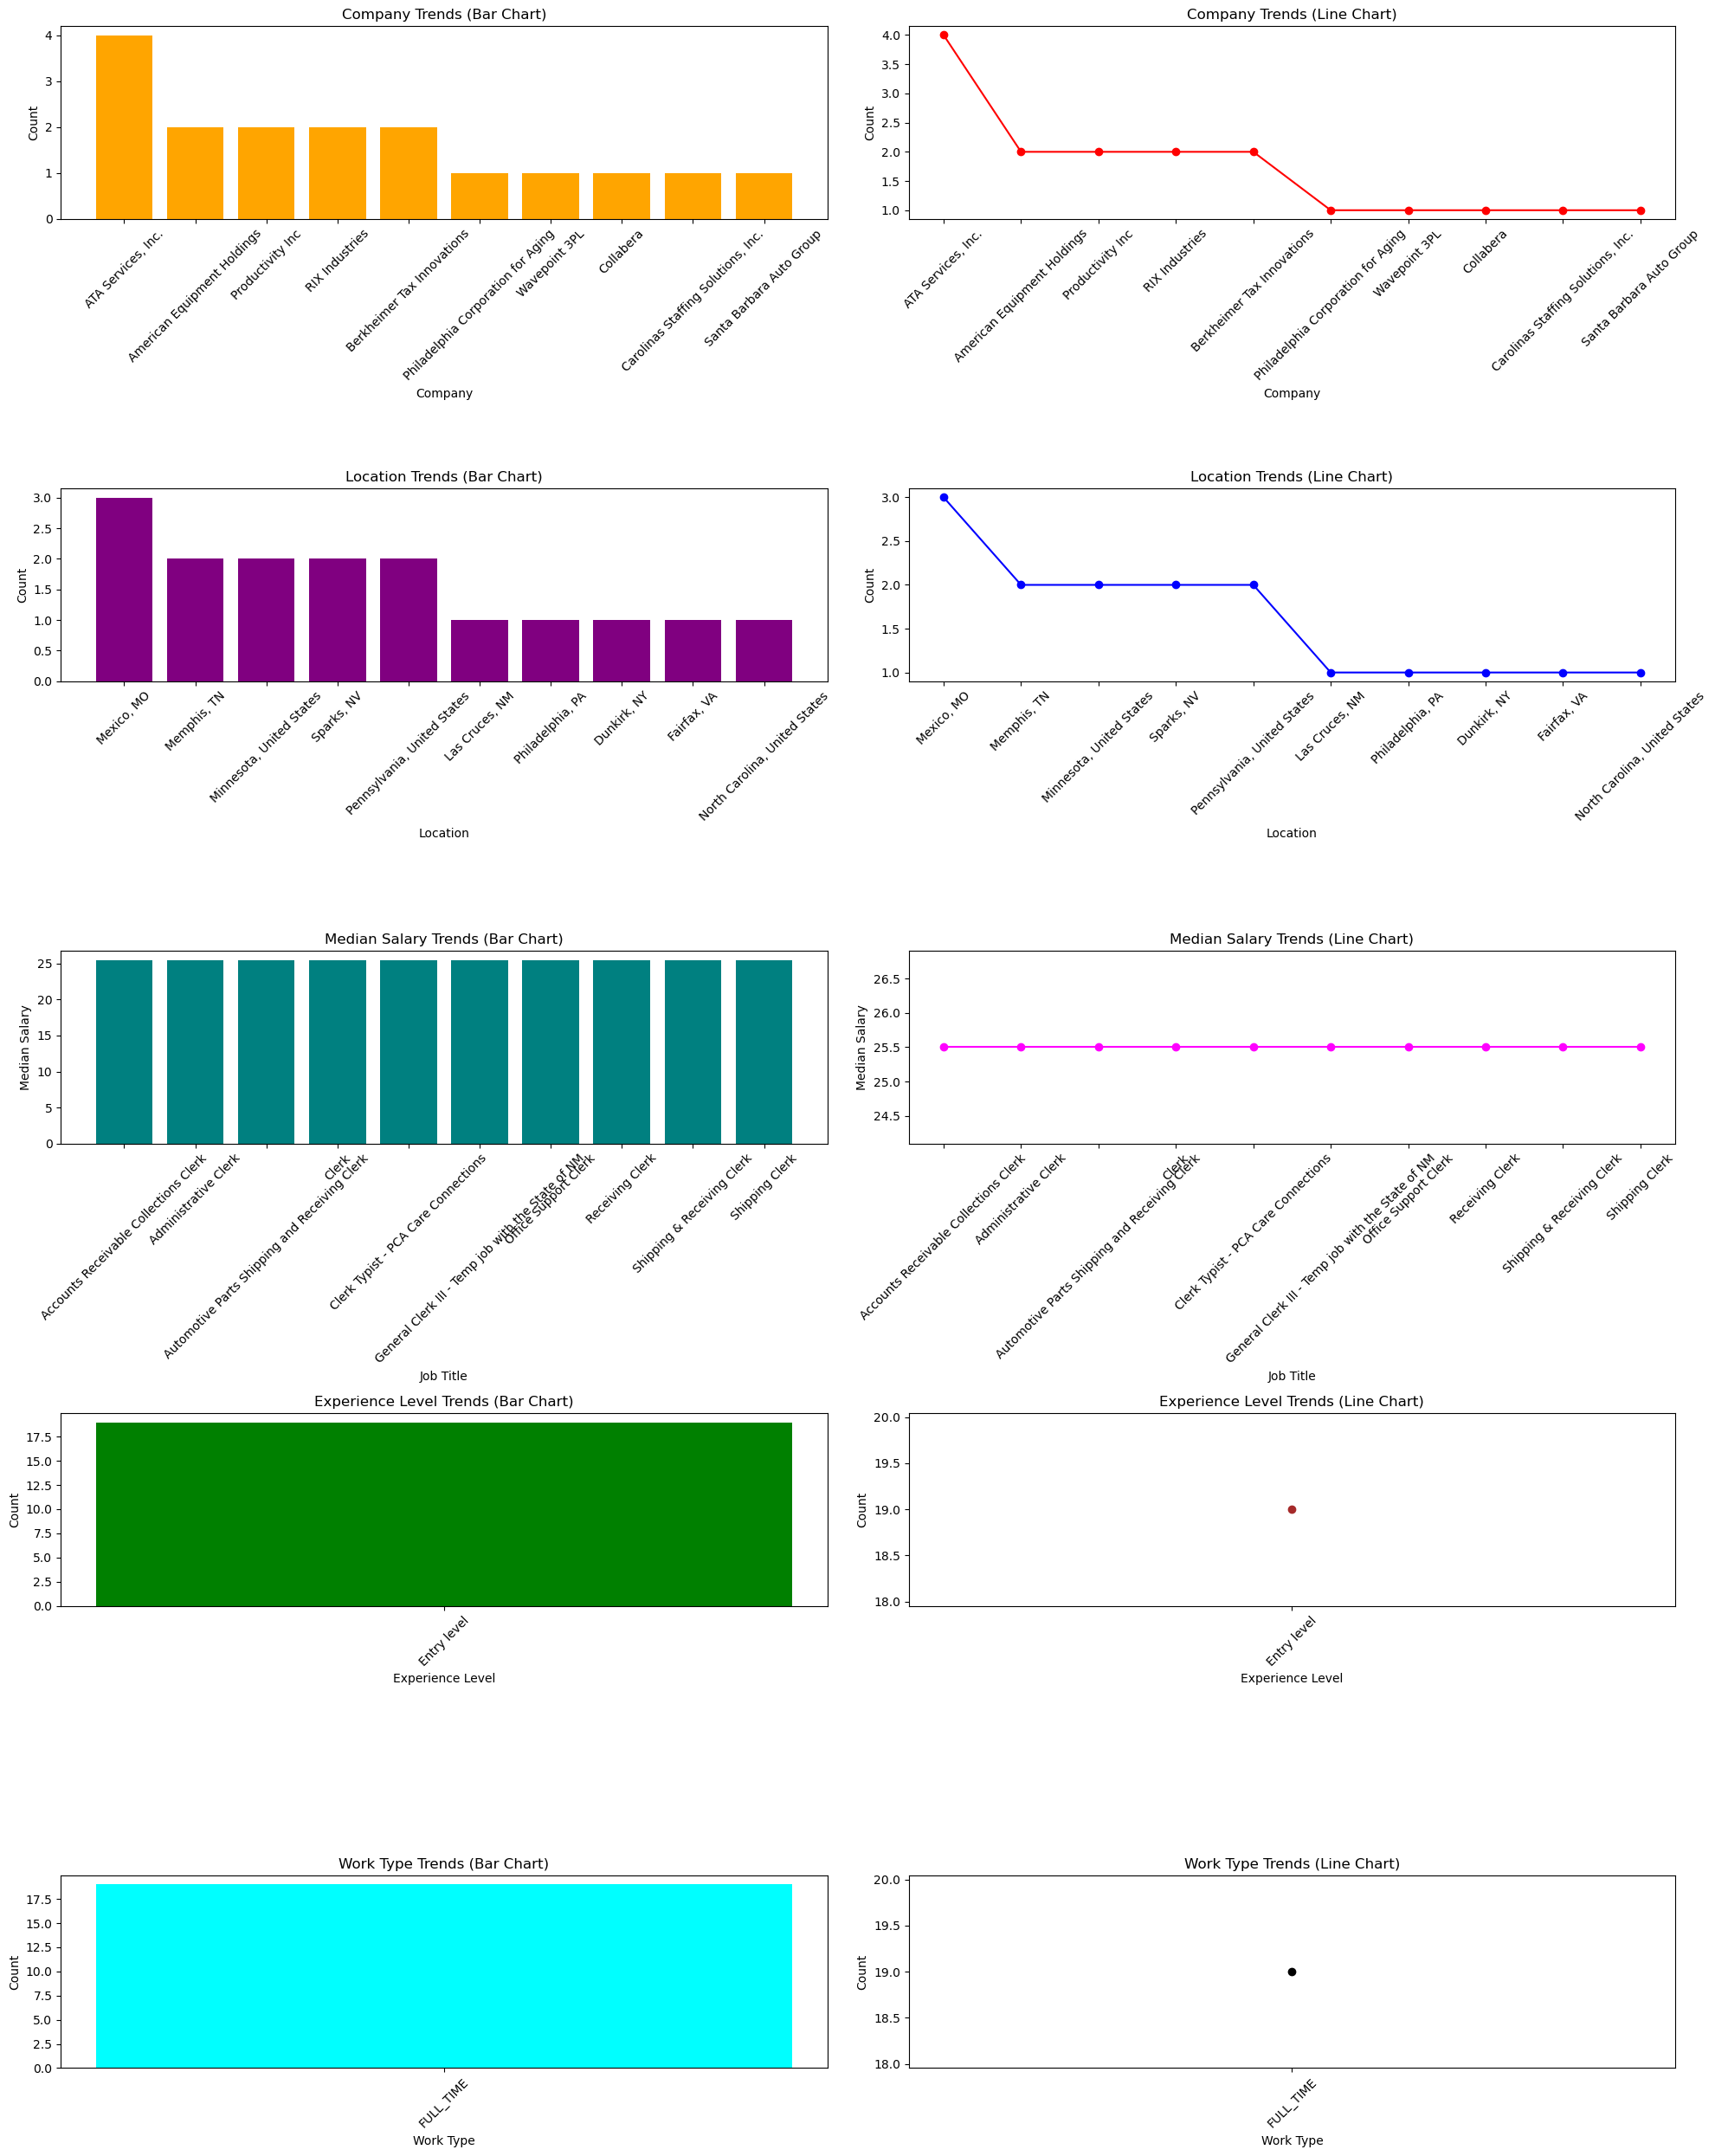

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_trends(df, job_role):
    # Filter data based on the selected job role
    filtered_df = df[df['title'].str.contains(job_role, case=False, na=False)]

    # Check if data exists for the job role
    if filtered_df.empty:
        print(f"No data found for job role: {job_role}")
        return

    # Grouping and counting for company, location, experience level, work type, and compensation type trends
    company_counts = filtered_df['company_name'].value_counts()
    location_counts = filtered_df['location'].value_counts()
    experience_counts = filtered_df['formatted_experience_level'].value_counts()
    work_type_counts = filtered_df['work_type'].value_counts()
    compensation_counts = filtered_df['compensation_type'].value_counts()

    # Handling salary trends (using max, median, and min salaries)
    salary_trends = filtered_df.groupby('title')[['max_salary', 'med_salary', 'min_salary']].mean().sort_values(by='med_salary', ascending=False)

    # Plotting
    fig, axs = plt.subplots(5, 2, figsize=(20, 25))  # 5 trends with bar and line charts side by side

    # Function to create bar and line charts
    def plot_bar_line(ax_bar, ax_line, data, title, xlabel, ylabel, color_bar, color_line):
        ax_bar.bar(data.index[:10], data.values[:10], color=color_bar)  # Top 10
        ax_bar.set_title(f'{title} (Bar Chart)')
        ax_bar.set_xlabel(xlabel)
        ax_bar.set_ylabel(ylabel)
        ax_bar.tick_params(axis='x', rotation=45)

        ax_line.plot(data.index[:10], data.values[:10], marker='o', linestyle='-', color=color_line)
        ax_line.set_title(f'{title} (Line Chart)')
        ax_line.set_xlabel(xlabel)
        ax_line.set_ylabel(ylabel)
        ax_line.tick_params(axis='x', rotation=45)

    # Plotting each trend
    plot_bar_line(axs[0, 0], axs[0, 1], company_counts, 'Company Trends', 'Company', 'Count', 'orange', 'red')
    plot_bar_line(axs[1, 0], axs[1, 1], location_counts, 'Location Trends', 'Location', 'Count', 'purple', 'blue')
    plot_bar_line(axs[2, 0], axs[2, 1], salary_trends['med_salary'], 'Median Salary Trends', 'Job Title', 'Median Salary', 'teal', 'magenta')
    plot_bar_line(axs[3, 0], axs[3, 1], experience_counts, 'Experience Level Trends', 'Experience Level', 'Count', 'green', 'brown')
    plot_bar_line(axs[4, 0], axs[4, 1], work_type_counts, 'Work Type Trends', 'Work Type', 'Count', 'cyan', 'black')
    
    plt.tight_layout()
    plt.show()

# Get user input for the job role
job_role = input("Enter the job role to analyze trends: ")

# Call the function to plot trends
plot_trends(df, job_role)
